# Capstone

## Imports

In [242]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import missingno as msno
import re
import seaborn as sns
import numpy as np
import spacy
from statistics import mean, median, mode

## Retreive data

In [243]:
path_train_data = r"..\Data_Sets\training_set_rel3.xlsx"
df_all_data = pd.read_excel(path_train_data)
df_all_data.head()
df_all_data.essay_set.value_counts()

5    1805
2    1800
6    1800
1    1783
4    1772
3    1726
7    1569
8     723
Name: essay_set, dtype: int64

## EDA

### Data info

In [244]:
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12978 entries, 0 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12978 non-null  int64  
 1   essay_set       12978 non-null  int64  
 2   essay           12978 non-null  object 
 3   rater1_domain1  12977 non-null  float64
 4   rater2_domain1  12977 non-null  float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12977 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

### Filter data for 10th grade papers

In [245]:
df_grade_10 = df_all_data.copy()
essay_set_list = [2, 3, 4, 6, 8]
df_grade_10 = df_grade_10.loc[df_grade_10["essay_set"].isin(essay_set_list)]
df_grade_10.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
1783,2978,2,Certain materials being removed from libraries...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,2.0,NaN,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,2980,2,Do you think that libraries should remove cert...,2.0,3.0,NaN,2.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1786,2981,2,"In @DATE1's world, there are many things found...",4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1787,2982,2,In life you have the 'offensive things'. The l...,4.0,4.0,NaN,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check info again

In [246]:
df_grade_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7821 entries, 1783 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        7821 non-null   int64  
 1   essay_set       7821 non-null   int64  
 2   essay           7821 non-null   object 
 3   rater1_domain1  7820 non-null   float64
 4   rater2_domain1  7820 non-null   float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   7820 non-null   float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   723 non-null    float64
 11  rater1_trait2   723 non-null    float64
 12  rater1_trait3   723 non-null    float64
 13  rater1_trait4   723 non-null    float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   723 non-null    float64
 17  rater2_trait2   723 non-null 

In [247]:
df_grade_10 = df_grade_10.dropna(axis=1, how='all')
df_grade_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7821 entries, 1783 to 12977
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        7821 non-null   int64  
 1   essay_set       7821 non-null   int64  
 2   essay           7821 non-null   object 
 3   rater1_domain1  7820 non-null   float64
 4   rater2_domain1  7820 non-null   float64
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   7820 non-null   float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   723 non-null    float64
 11  rater1_trait2   723 non-null    float64
 12  rater1_trait3   723 non-null    float64
 13  rater1_trait4   723 non-null    float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   723 non-null    float64
 17  rater2_trait2   723 non-null 

### Missing values matrix

<AxesSubplot:>

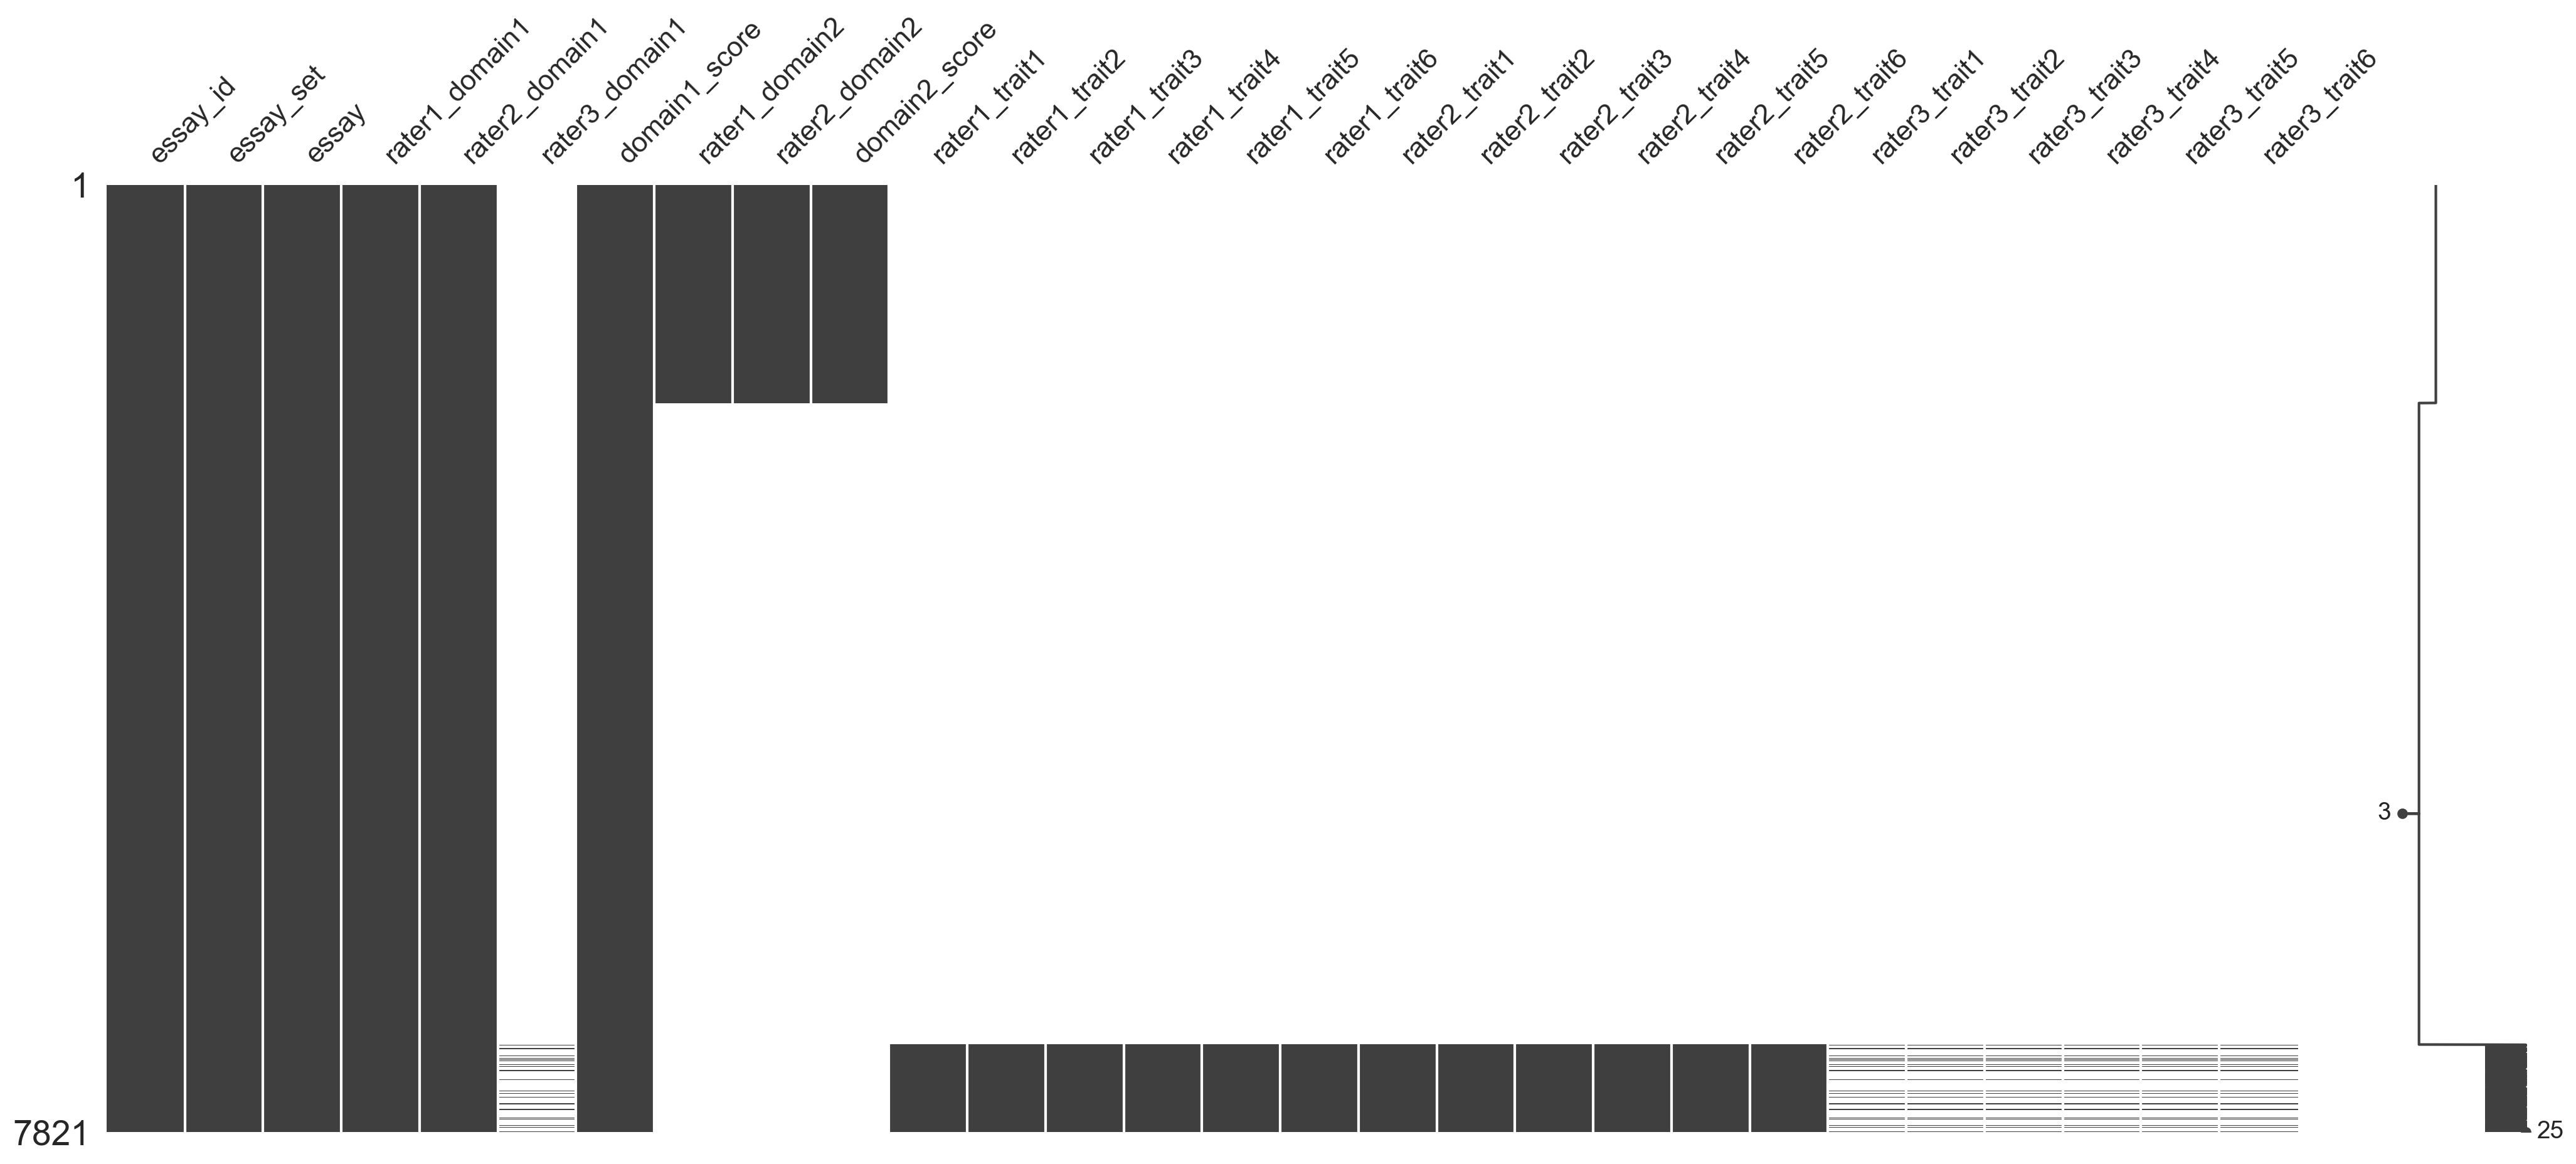

In [248]:
# missing values matrix
msno.matrix(df_grade_10)


In [249]:
df_grade_10.essay_set[~df_grade_10["rater1_trait1"].isnull()].unique()

array([8], dtype=int64)

In [250]:
df_grade_10 = df_grade_10[["essay_id", "essay_set", "essay", "domain1_score"]]
df_grade_10.head()

,essay_id,essay_set,essay,domain1_score
1783,2978,2,Certain materials being removed from libraries...,4.0
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0
1785,2980,2,Do you think that libraries should remove cert...,2.0
1786,2981,2,"In @DATE1's world, there are many things found...",4.0
1787,2982,2,In life you have the 'offensive things'. The l...,4.0


In [251]:
essay_df = df_grade_10.copy()

df_2_essay = essay_df[essay_df["essay_set"] == 2]
df_3_essay = essay_df[essay_df["essay_set"] == 3]
df_4_essay = essay_df[essay_df["essay_set"] == 4]
df_6_essay = essay_df[essay_df["essay_set"] == 6]
df_8_essay = essay_df[essay_df["essay_set"] == 8]


# Only being used to make the anonymization_list
df_6_essay_ser = df_6_essay["essay"].reset_index(drop=True)
list_6_essay = df_6_essay_ser.tolist()

In [252]:
# msno.matrix(df_3_essay)

In [253]:
# df_2_essay["domain1_score"].head()
# df_3_essay["domain1_score"].head()
# df_4_essay["domain1_score"].head()
# df_6_essay["domain1_score"].head()
# df_8_essay["domain1_score"].head()

In [254]:
df_8_essay["domain1_score"] = df_8_essay.domain1_score.astype(int)

### Add essay prompts

In [255]:
prompts = pd.read_excel("../Data_Sets/prompts.xlsx")

prompt_2 = prompts.loc[0, "prompt"]
prompt_8 = prompts.loc[4, "prompt"]

prompt_3 = prompts.loc[1, "prompt"]
prompt_4 = prompts.loc[2, "prompt"]
prompt_6 = prompts.loc[3, "prompt"]

df_2_essay["prompt"] = prompt_2
df_3_essay["prompt"] = prompt_3
df_4_essay["prompt"] = prompt_4
df_6_essay["prompt"] = prompt_6
df_8_essay["prompt"] = prompt_8

## Persuasive Essay's

### Plot - domain1_score

<AxesSubplot:xlabel='domain1_score'>

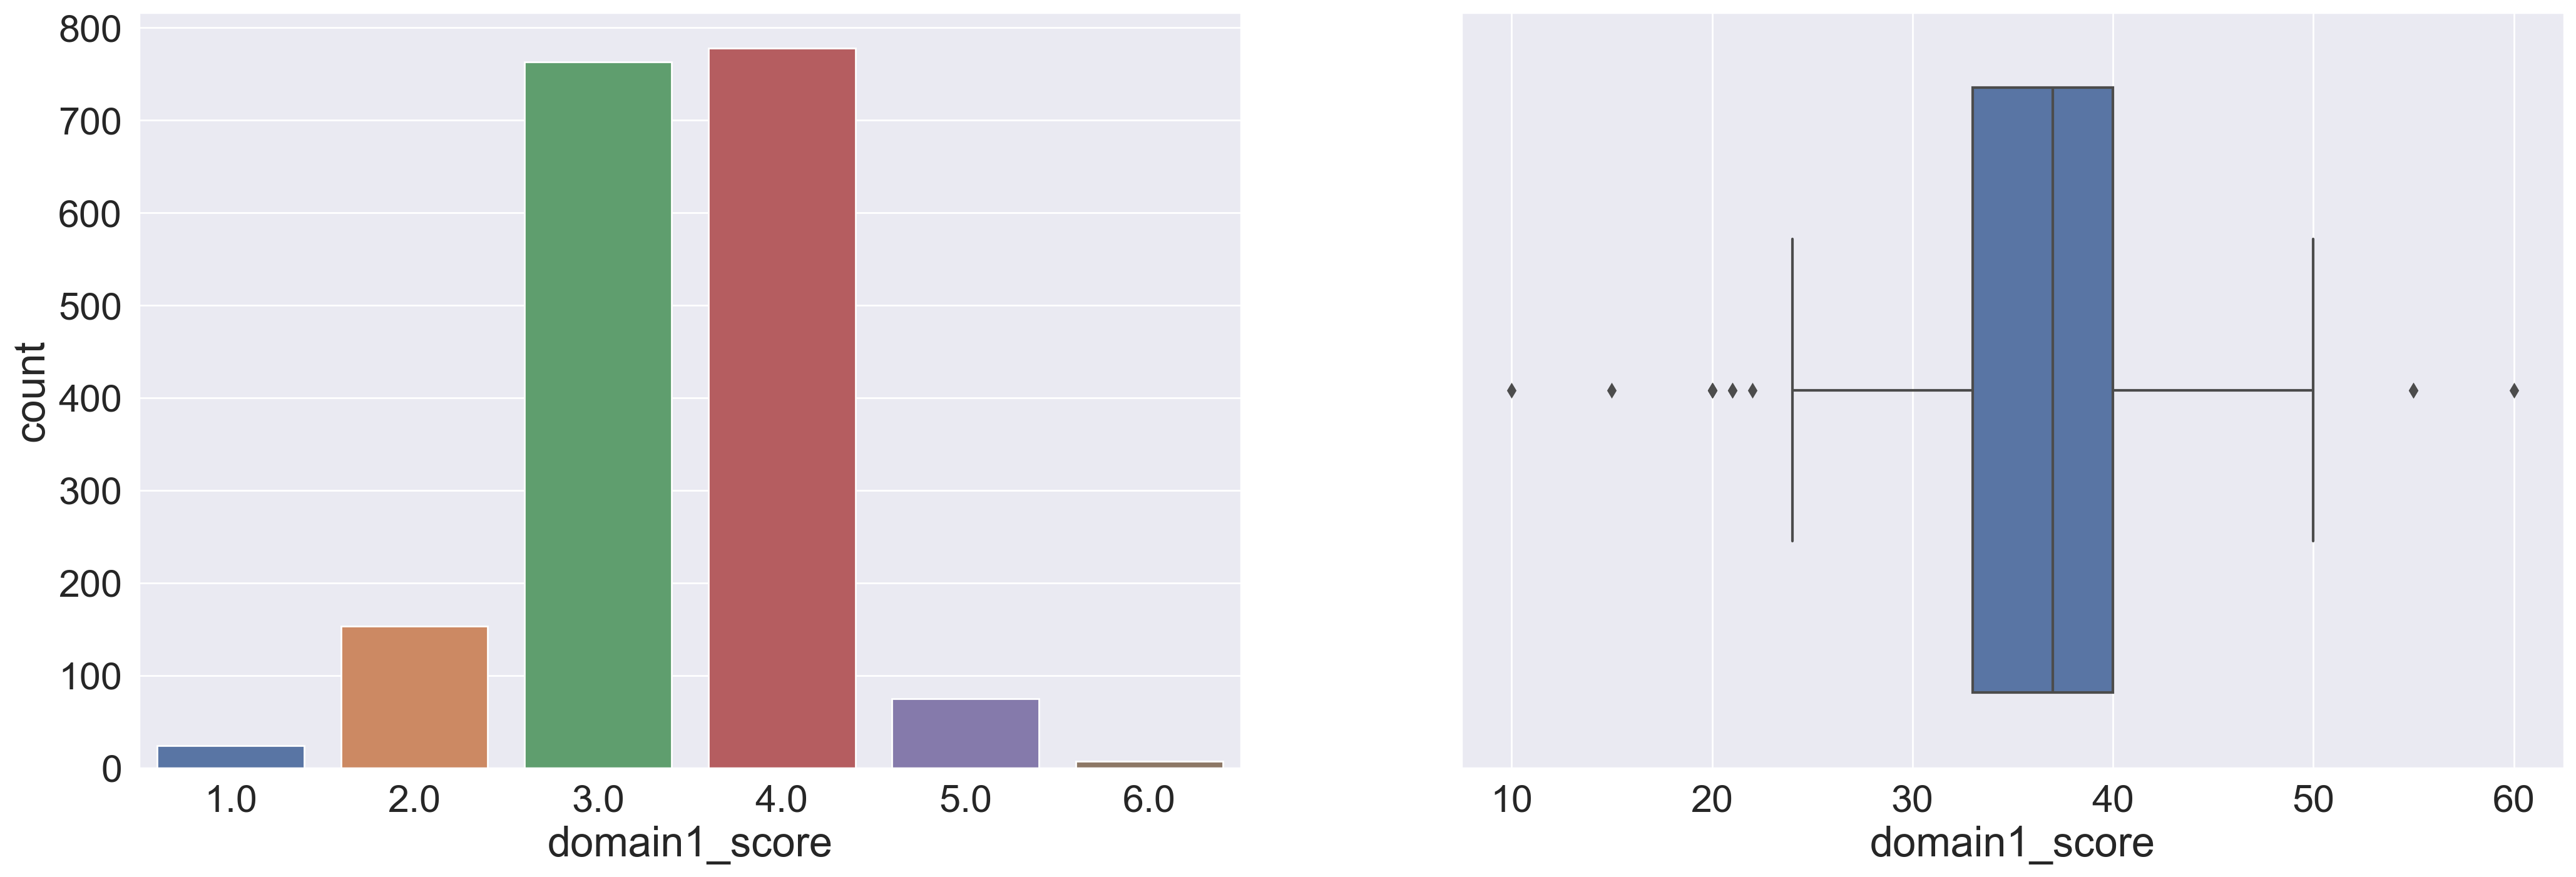

In [256]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.countplot(x="domain1_score", data=df_2_essay, ax=axes[0])
sns.boxplot(x="domain1_score", data=df_8_essay, ax=axes[1])

In [257]:
df_8_essay["domain1_score"].describe()

count    723.000000
mean      36.950207
std        5.753502
min       10.000000
25%       33.000000
50%       37.000000
75%       40.000000
max       60.000000
Name: domain1_score, dtype: float64

### Set Target

In [286]:
df_2_essay["is_success"] = np.where(df_2_essay["domain1_score"] > 3, 1, 0) # Greater than 75th percentile
df_8_essay["is_success"] = np.where(df_8_essay["domain1_score"] > 40, 1, 0) # Greater than 75th percentile

###  Check class balance

<AxesSubplot:xlabel='is_success', ylabel='count'>

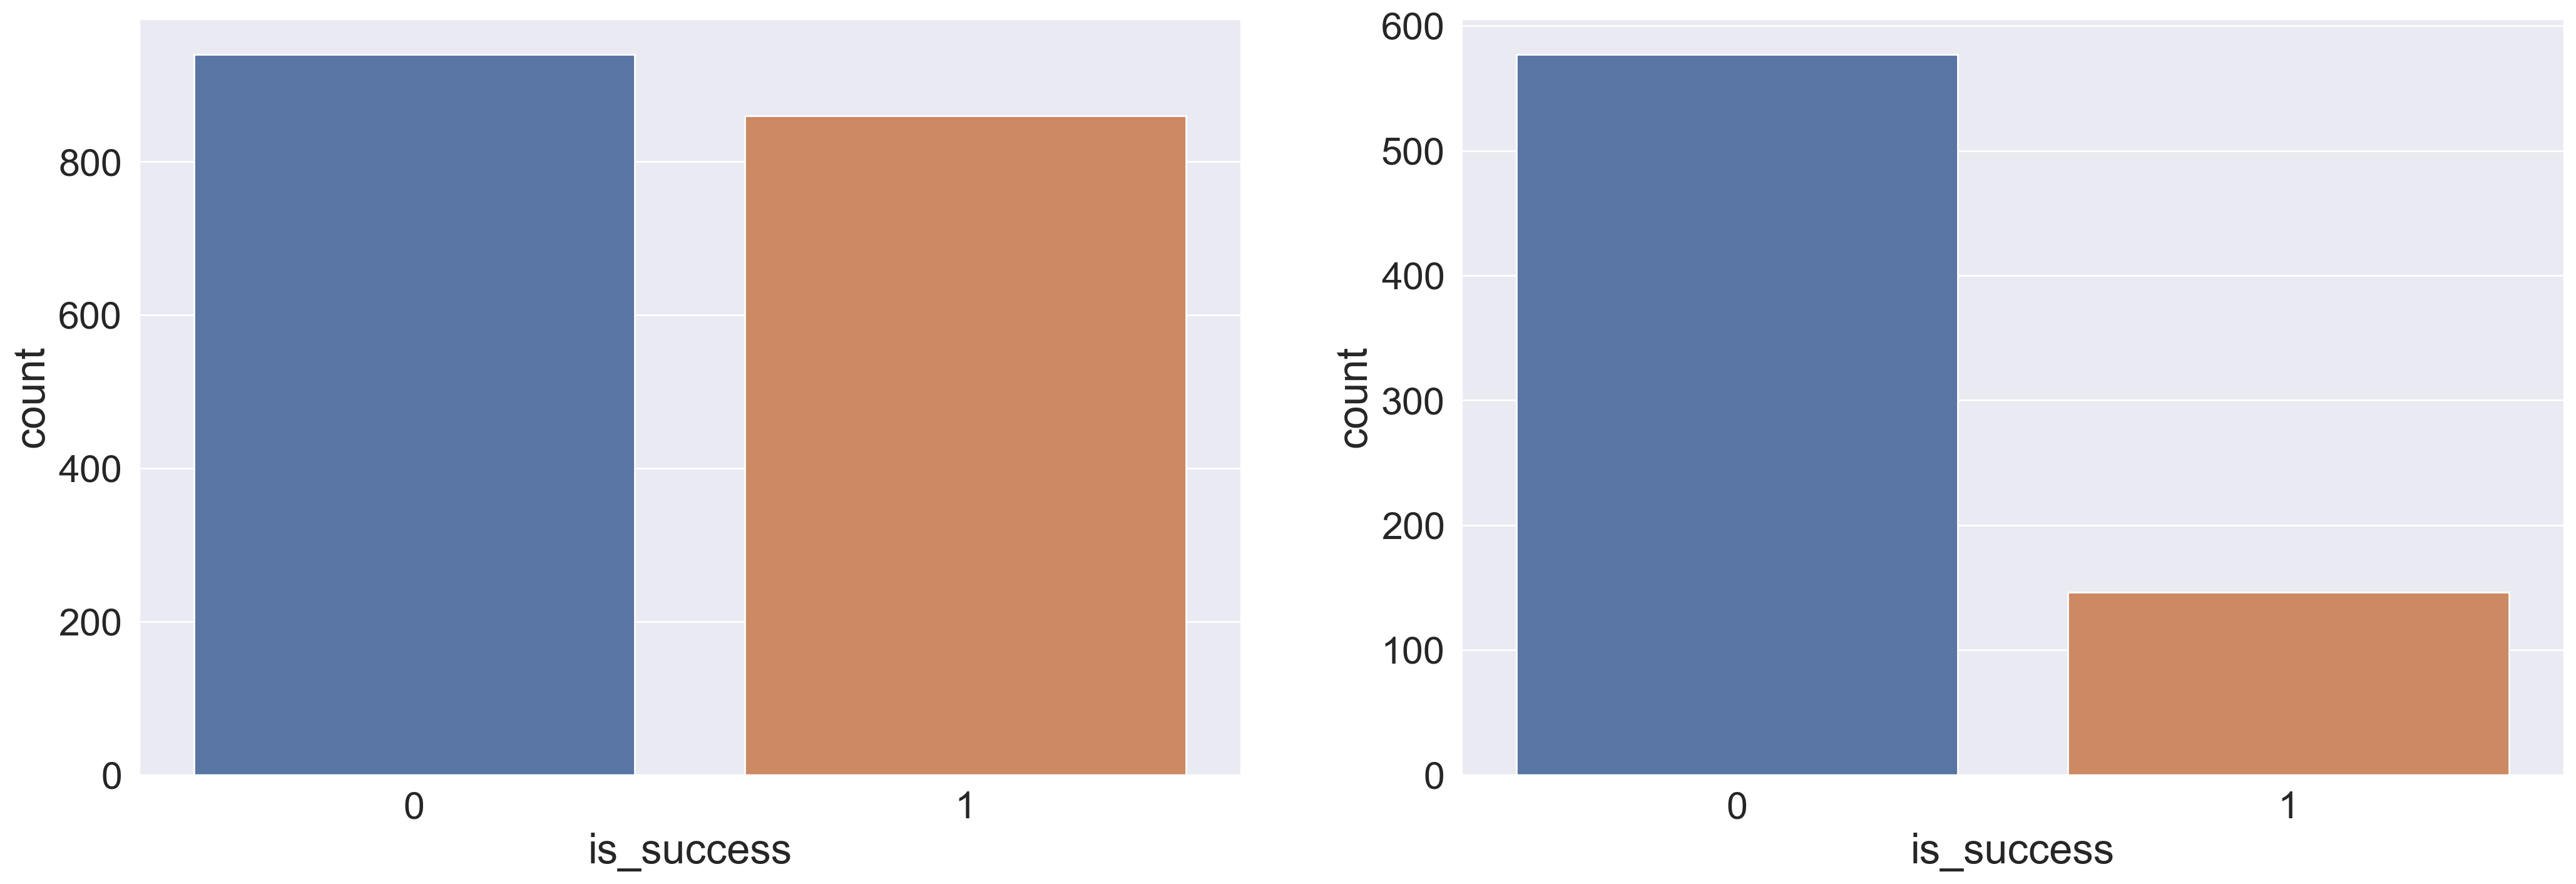

In [288]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.countplot(x="is_success", data=df_2_essay, ax=axes[0])
sns.countplot(x="is_success", data=df_8_essay, ax=axes[1])

### Class balance results

In [289]:

print("Essay 2 counts:")
print(df_2_essay["is_success"].value_counts())
print(df_2_essay["is_success"].value_counts(normalize=True))

print("\n\n")

print("Essay 8 counts:")
print(df_8_essay["is_success"].value_counts())
print(df_8_essay["is_success"].value_counts(normalize=True))
print("\n\n")

Essay 2 counts:
0    940
1    860
Name: is_success, dtype: int64
0    0.522222
1    0.477778
Name: is_success, dtype: float64



Essay 8 counts:
0    577
1    146
Name: is_success, dtype: int64
0    0.798064
1    0.201936
Name: is_success, dtype: float64





### Combine dataframes

#### Check df shapes

In [290]:
df_2_essay.shape, df_8_essay.shape

((1800, 6), (723, 6))

#### Concatenate dataframes

In [291]:
prsv_essay_df = pd.concat([df_2_essay, df_8_essay], axis=0)
print(prsv_essay_df.shape)
prsv_essay_df.head()

(2523, 6)


,essay_id,essay_set,essay,domain1_score,prompt,is_success
1783,2978,2,Certain materials being removed from libraries...,4.0,"Censorship in the Libraries\n""All of us can th...",1
1784,2979,2,Write a persuasive essay to a newspaper reflec...,1.0,"Censorship in the Libraries\n""All of us can th...",0
1785,2980,2,Do you think that libraries should remove cert...,2.0,"Censorship in the Libraries\n""All of us can th...",0
1786,2981,2,"In @DATE1's world, there are many things found...",4.0,"Censorship in the Libraries\n""All of us can th...",1
1787,2982,2,In life you have the 'offensive things'. The l...,4.0,"Censorship in the Libraries\n""All of us can th...",1


## Source Dependent Responses Essay's

### Plot - domain1_score

<AxesSubplot:xlabel='domain1_score', ylabel='count'>

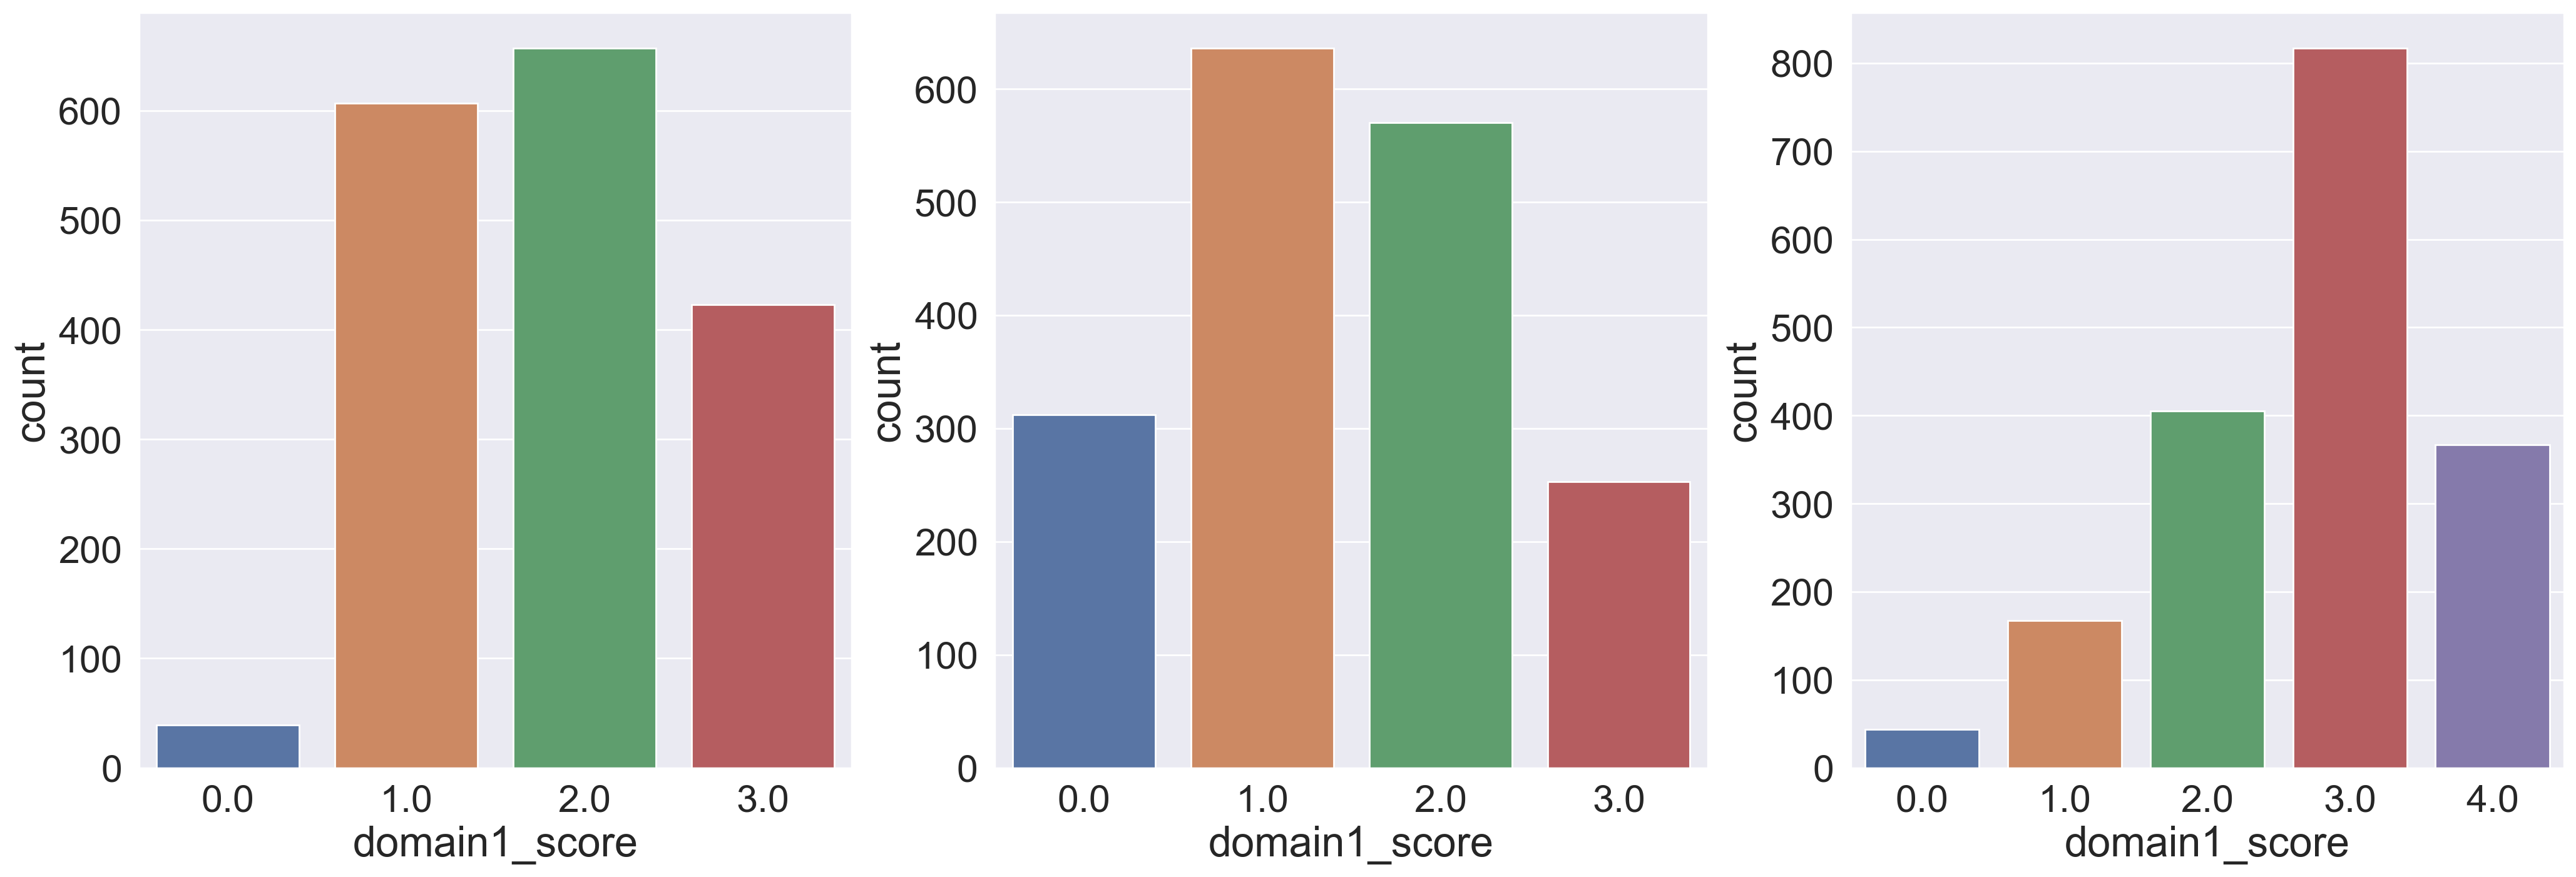

In [292]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 3, figsize=a4_dims)

sns.countplot(x="domain1_score", data=df_3_essay, ax=axes[0])
sns.countplot(x="domain1_score", data=df_4_essay, ax=axes[1])
sns.countplot(x="domain1_score", data=df_6_essay, ax=axes[2])



### Set Target

In [264]:
df_3_essay["is_success"] = np.where(df_3_essay["domain1_score"] > 2, 1, 0)
df_4_essay["is_success"] = np.where(df_4_essay["domain1_score"] > 2, 1, 0)
df_6_essay["is_success"] = np.where(df_6_essay["domain1_score"] > 2, 1, 0)

### Check class balance

<AxesSubplot:xlabel='is_success', ylabel='count'>

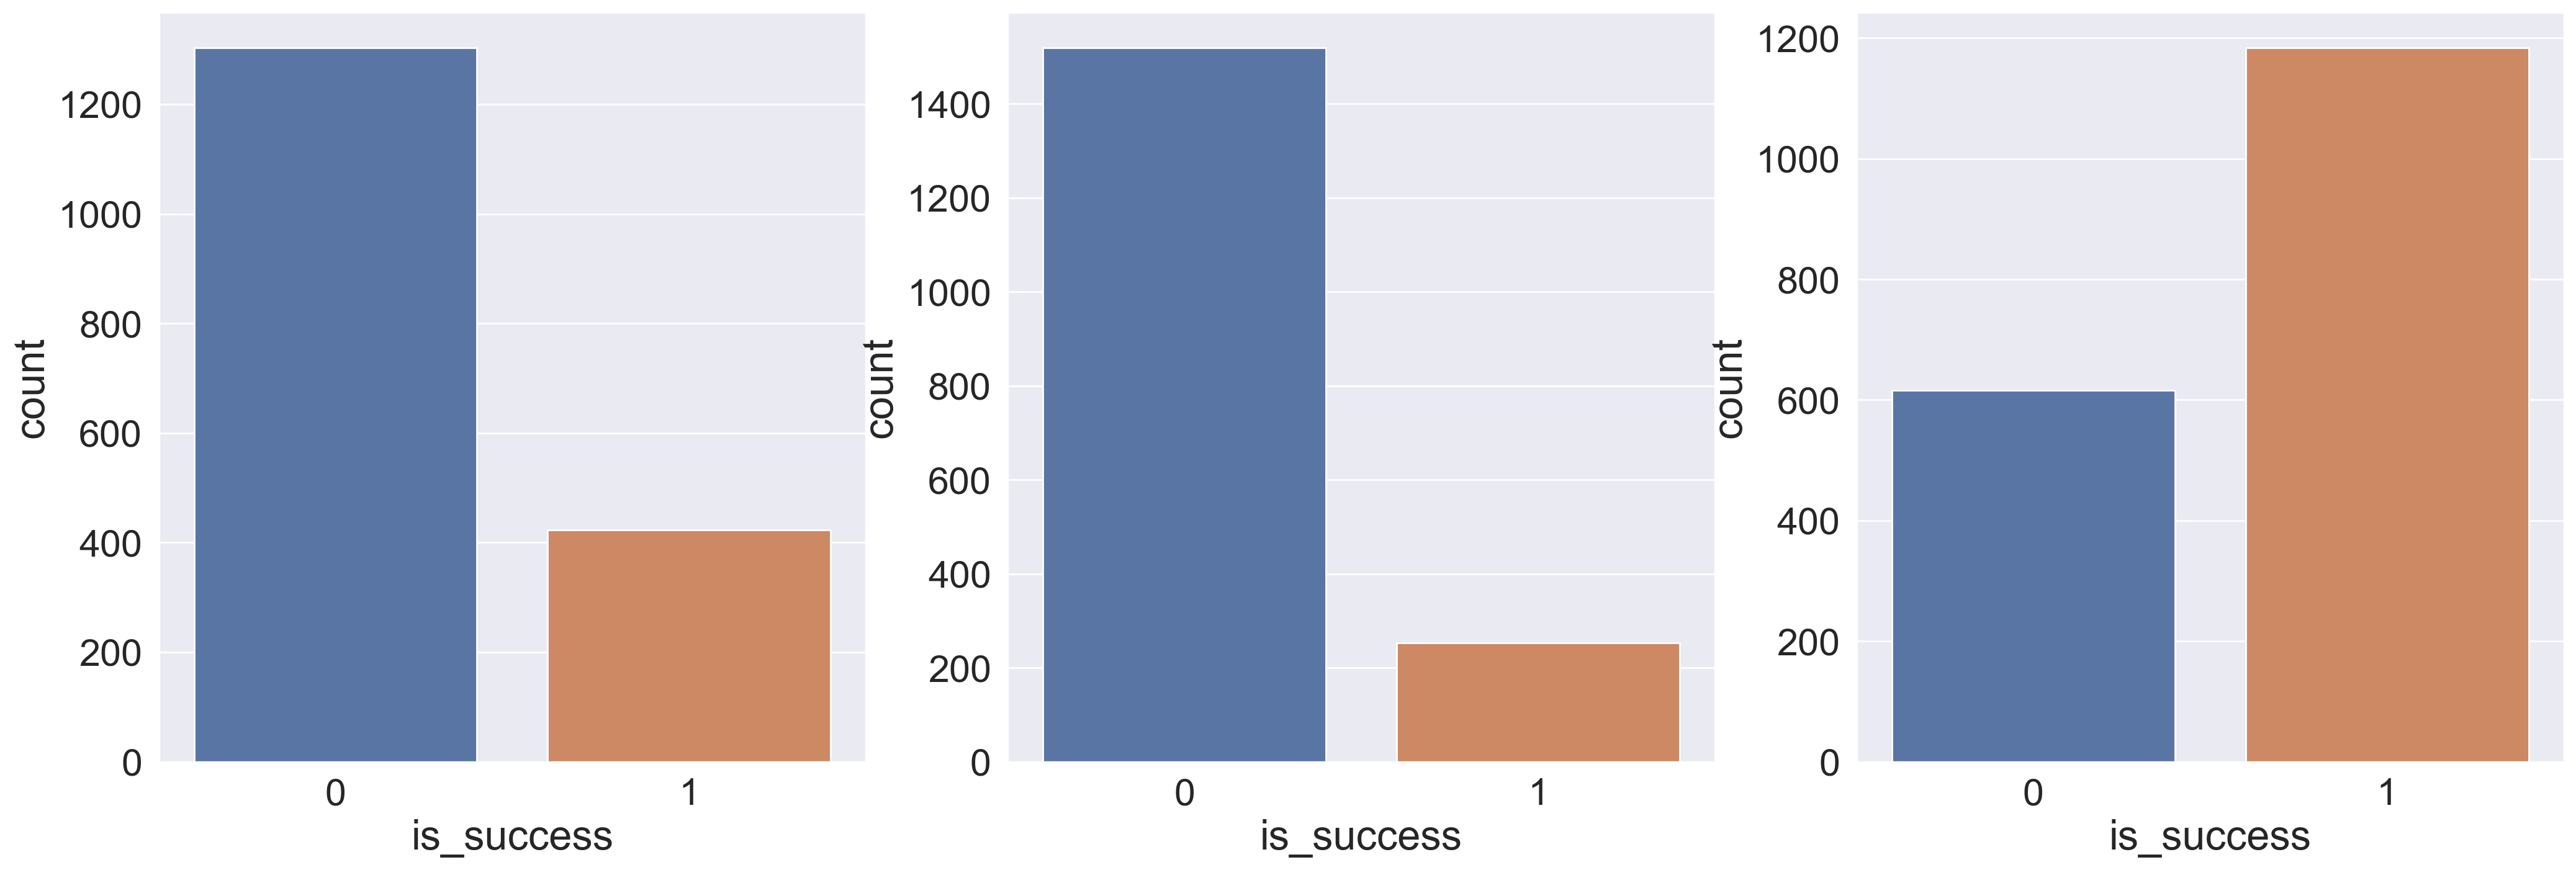

In [265]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 3, figsize=a4_dims)

sns.countplot(x="is_success", data=df_3_essay, ax=axes[0])
sns.countplot(x="is_success", data=df_4_essay, ax=axes[1])
sns.countplot(x="is_success", data=df_6_essay, ax=axes[2])

### Class balance results

In [266]:
print("Essay 3 counts:")
print(df_3_essay["is_success"].value_counts())
print(df_3_essay["is_success"].value_counts(normalize=True))

print("\n\n")

print("Essay 4 counts:")
print(df_4_essay["is_success"].value_counts())
print(df_4_essay["is_success"].value_counts(normalize=True))
print("\n\n")

print("Essay 6 counts:")
print(df_6_essay["is_success"].value_counts())
print(df_6_essay["is_success"].value_counts(normalize=True))

Essay 3 counts:
0    1303
1     423
Name: is_success, dtype: int64
0    0.754925
1    0.245075
Name: is_success, dtype: float64



Essay 4 counts:
0    1519
1     253
Name: is_success, dtype: int64
0    0.857223
1    0.142777
Name: is_success, dtype: float64



Essay 6 counts:
1    1184
0     616
Name: is_success, dtype: int64
1    0.657778
0    0.342222
Name: is_success, dtype: float64


### Combine data

#### Check df shape

In [267]:
df_3_essay.shape, df_4_essay.shape, df_6_essay.shape

((1726, 6), (1772, 6), (1800, 6))

#### Concat df's

In [268]:
srd_essay_df = pd.concat([df_3_essay, df_4_essay, df_6_essay], axis=0)
print(srd_essay_df.shape)
srd_essay_df.head()

(5298, 6)


,essay_id,essay_set,essay,domain1_score,prompt,is_success
3583,5978,3,The features of the setting affect the cyclist...,1.0,ROUGH ROAD AHEAD: Do Not Exceed Posted Speed L...,0
3584,5979,3,The features of the setting affected the cycli...,2.0,ROUGH ROAD AHEAD: Do Not Exceed Posted Speed L...,0
3585,5980,3,Everyone travels to unfamiliar places. Sometim...,1.0,ROUGH ROAD AHEAD: Do Not Exceed Posted Speed L...,0
3586,5981,3,I believe the features of the cyclist affected...,1.0,ROUGH ROAD AHEAD: Do Not Exceed Posted Speed L...,0
3587,5982,3,The setting effects the cyclist because of the...,2.0,ROUGH ROAD AHEAD: Do Not Exceed Posted Speed L...,0


## NLP Analysis

### Anonymization

In [269]:
anonymization_list = []
for essay in list_6_essay:
    x = re.findall("(?:^|\s)(\@\w+)", essay)
    anonymization_list += x

anonymization_ser = pd.Series(anonymization_list)
anonymization_ser_count = anonymization_ser.value_counts()
anonymization_ser.unique()

array(['@CAPS1', '@NUM1', '@NUM2', '@CAPS2', '@ORGANIZATION3',
       '@LOCATION1', '@DATE1', '@MONEY1', '@ORGANIZATION2',
       '@ORGANIZATION1', '@NUM3', '@CAPS3', '@CAPS4', '@CAPS5', '@CAPS6',
       '@CAPS7', '@CAPS9', '@NUM4', '@LOCATION3', '@PERSON1', '@DATE2',
       '@LOCATION2', '@NUM5', '@LOCATION4', '@NUM6', '@CAPS8', '@CAPS10',
       '@NUM7', '@PERSON2', '@ORGANIZATION1n', '@ORGANIZATION5'],
      dtype=object)

### PyTextRank Functions

In [270]:
def get_sent_bounds(doc):
    # Get phrases, vectorize and get sent bounds
    limit_phrases = 4

    phrase_id = 0
    sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]

    # Loop through each phrase from the document
    for p in doc._.phrases:
        # ic(phrase_id, p.text, p.rank)

        # Find every sentence the chunk is apert of
        # Loop thorugh each phrase chunk
        for chunk in p.chunks:
            # ic(chunk.start, chunk.end)

            # Loop through all sentences in sent_bounds
            for sent_start, sent_end, sent_vector in sent_bounds:
                # Check if chunk is in the sentence
                if chunk.start >= sent_start and chunk.end <= sent_end:
                    # ic(sent_start, chunk.start, chunk.end, sent_end)

                    # Add phrase_id to sent_vector from sent_bounds
                    sent_vector.add(phrase_id)
                    break

        phrase_id += 1

        if phrase_id == limit_phrases:
            break
    
    return sent_bounds

def get_unit_vector(key_doc):

    # Get phrases, vectorize and get sent bounds
    limit_phrases = 4

    phrase_id = 0
    unit_vector = []

    # Loop through each phrase from the document
    for p in key_doc._.phrases:
        # ic(phrase_id, p.text, p.rank)

        # Add rank to unit_vector list
        unit_vector.append(p.rank)

        phrase_id += 1

        if phrase_id == limit_phrases:
            break

    return unit_vector

def normalize_unit_vector(unit_vector):
    # Sum unit vectors for normalization
    sum_ranks = sum(unit_vector)

    # Normalize unit vector
    unit_vector = [ rank/sum_ranks for rank in unit_vector ]

    return unit_vector


def sent_uv_rank(unit_vector, sent_bounds):
    # Ranking each sentence based on how similiar they are,
    # in relation to each unit vector, using sum of squares 
    from math import sqrt

    sent_rank = {}
    sent_id = 0

    # Loop through sent_bound list
    for sent_start, sent_end, sent_vector in sent_bounds:
        # ic(sent_vector)
        sum_sq = 0.0
        # ic

        # Loop through each phrase in the key vector and
        # compare it to the sentence
        for phrase_id in range(len(unit_vector)):
            # ic(phrase_id, key_unit_vector[phrase_id])

            # If phrase_id is NOT in the sent add 
            # get the sum_sq of the unit_vector length
            if phrase_id not in sent_vector:
                sum_sq += unit_vector[phrase_id]**2.0

        # Get the square root of the sum of squares
        sent_rank[sent_id] = sqrt(sum_sq)
        sent_id += 1

    return sent_rank


def get_top_ranks(doc, sent_rank):
    from operator import itemgetter
    # sort sent_rank
    sorted(sent_rank.items(), key=itemgetter(1))
    # print(sorted(sent_rank.items(), key=itemgetter(1)))

    # limit for the number of top sentences to collect
    limit_sentences = 5

    sent_text = {}
    sent_id = 0
    top_5_ranks = []
    top_5_word_count = []
    # top_5_avg_sent_len = []
    top_5_lex_div = []

    # Create id for each sentence from the document
    for sent in doc.sents:
        sent_text[sent_id] = sent
        sent_id += 1

    num_sent = 0

    # Loop through sorted sent_rank list
    for sent_id, rank in sorted(sent_rank.items(), key=itemgetter(1)):
        # ic(sent_id, sent_text[sent_id])
        num_sent += 1
        top_5_ranks.append(rank)
        
        top_5_word_count.append(surface_proxies.word_count(sent_text[sent_id]))
        # top_5_avg_sent_len.append(surface_proxies.average_sentence_length(doc))
        top_5_lex_div.append(TRUNAJOD.ttr.lexical_diversity_mtld(doc))

        if num_sent == limit_sentences:
            break

    # print(top_5_ranks)
    # min_sent = sent_text[limit_sentences]
    # max_sent = sent_text[0]
    rank_avg = mean(top_5_ranks)
    rank_med = median(top_5_ranks)
    rank_mode = mode(top_5_ranks)

    mean_word_count = mean(top_5_word_count)
    # avg_sent_len = median(top_5_avg_sent_len)
    mean_lex_div = mean(top_5_lex_div)

    return rank_avg, rank_med, rank_mode, mean_word_count, mean_lex_div

def pol_subj(blob):
    polarity = blob.sentiment_assessments.polarity
    subjectivity = blob.sentiment_assessments.subjectivity

    return polarity, subjectivity

### PyTextRank config

In [271]:
@spacy.registry.misc("articles_scrubber")
def articles_scrubber():
    def scrubber_func(span: spacy.tokens.Span) -> str:
        for token in span:
            if token.pos_ not in ["DET", "PRON", "ADJ"]:
                break
            
            span = span[1:]
        return span.lemma_
    return scrubber_func

### NLP feature extraction

In [272]:
import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spacy
# import textract  # To read .docx files
import TRUNAJOD.givenness
import TRUNAJOD.ttr
from TRUNAJOD import surface_proxies
from TRUNAJOD.syllabizer import Syllabizer
from TRUNAJOD import semantic_measures
import pytextrank
from icecream import ic


# model_df = prsv_essay_df.copy()

nlp = spacy.load("en_core_web_md")

features = {
    "word_count": [],
    "sentence_count": [],
    "average_sentence_length": [],
    "lexical_diversity_mltd": [],
    # "rank_mean": [],
    # "rank_med": [],
    # "rank_mode": [],
    "key_rank_mean":[],
    "key_rank_med": [],
    "key_rank_mode":[],
    "key_mean_word_count":[],
    "key_mean_lex_div":[],
    "success?": [],
}

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank", config={"scrubber": {"@misc": "articles_scrubber"}})

def run_feature_extraction(model_df):
    # Looping through essays
    for index, row in model_df.iterrows():
        # prompt value from row object
        prompt = row["prompt"]
        # Created by processing a string of text with the nlp object
        key_doc = nlp(prompt)

        # essay value from row object
        essay = row["essay"]
        # Created by processing a string of text with the nlp object
        doc = nlp(essay)
        
        num_sents = surface_proxies.sentence_count(doc)
        word_count = surface_proxies.word_count(doc)

        features["word_count"].append(word_count)
        features["sentence_count"].append(num_sents)
        features["average_sentence_length"].append(surface_proxies.average_sentence_length(doc))
        
        if num_sents > 3:
            # print(row["essay_id"], word_count)
            features["lexical_diversity_mltd"].append(TRUNAJOD.ttr.lexical_diversity_mtld(doc))
        
        else:
            features["lexical_diversity_mltd"].append(0)
        

        if num_sents > 3:

            sent_bounds = get_sent_bounds(doc)

            key_unit_vector = get_unit_vector(key_doc)
            key_unit_vector = normalize_unit_vector(key_unit_vector)
            key_sent_rank = sent_uv_rank(key_unit_vector, sent_bounds)
            key_rank_mean, key_rank_med, key_rank_mode, key_mean_word_count, key_mean_lex_div = get_top_ranks(doc, key_sent_rank)

            # unit_vector = get_unit_vector(doc)
            # sent_bounds = get_sent_bounds(doc)
            # unit_vector = normalize_unit_vector(unit_vector)
            # sent_rank = sent_uv_rank(unit_vector, sent_bounds)
            # rank_mean, rank_med, rank_mode, mean_word_count, mean_lex_div = get_top_ranks(doc, sent_rank)

            # features["rank_mean"].append(rank_mean)
            # features["rank_med"].append(rank_med)
            # features["rank_mode"].append(rank_mode)

            features["key_mean_word_count"].append(key_mean_word_count)
            features["key_mean_lex_div"].append(key_mean_lex_div)
            # print()

            features["key_rank_mean"].append(key_rank_mean)
            features["key_rank_med"].append(key_rank_med)
            features["key_rank_mode"].append(key_rank_mode)
        
        else:

            # features["rank_mean"].append(np.nan)
            # features["rank_med"].append(np.nan)
            # features["rank_mode"].append(np.nan)

            features["key_rank_mean"].append(np.nan)
            features["key_rank_med"].append(np.nan)
            features["key_rank_mode"].append(np.nan)
        
            features["key_mean_word_count"].append(np.nan)
            features["key_mean_lex_div"].append(np.nan)


        # this example 5th grade
        is_success = row["is_success"]
        features["success?"].append(is_success)

    return features


### PRSV essays - feature extraction

In [293]:
# Uncomment to use subset of data for debugging
num_rows = 8
# prsv_essay_df = prsv_essay_df.iloc[5:num_rows,:]

prsv_ft = run_feature_extraction(prsv_essay_df)

#### write to csv

In [295]:
prsv_res_df = pd.DataFrame(prsv_ft)
prsv_res_df.to_csv("prsv_res_df.csv", index=False)
print(prsv_res_df.shape)


(7569, 10)


In [296]:
prsv_res_df.head()

,word_count,sentence_count,average_sentence_length,lexical_diversity_mltd,key_rank_mean,key_rank_med,key_rank_mode,key_mean_word_count,key_mean_lex_div,success?
0,485,19,25.526316,54.420233,0.343375,0.336293,0.334466,37.6,54.420233,0
1,172,7,24.571429,26.505642,0.437006,0.501837,0.501837,28.0,26.505642,0
2,227,16,14.187500,61.379905,0.376780,0.411631,0.411631,18.4,61.379905,0
3,470,31,15.161290,48.742647,0.365697,0.336293,0.334466,16.4,48.742647,0
4,434,37,11.729730,79.310747,0.421279,0.440758,0.440758,13.2,79.310747,0


### PRSV essay - evaluate feature results

In [163]:
df = prsv_res_df.copy()

<AxesSubplot:xlabel='success?', ylabel='lexical_diversity_mltd'>

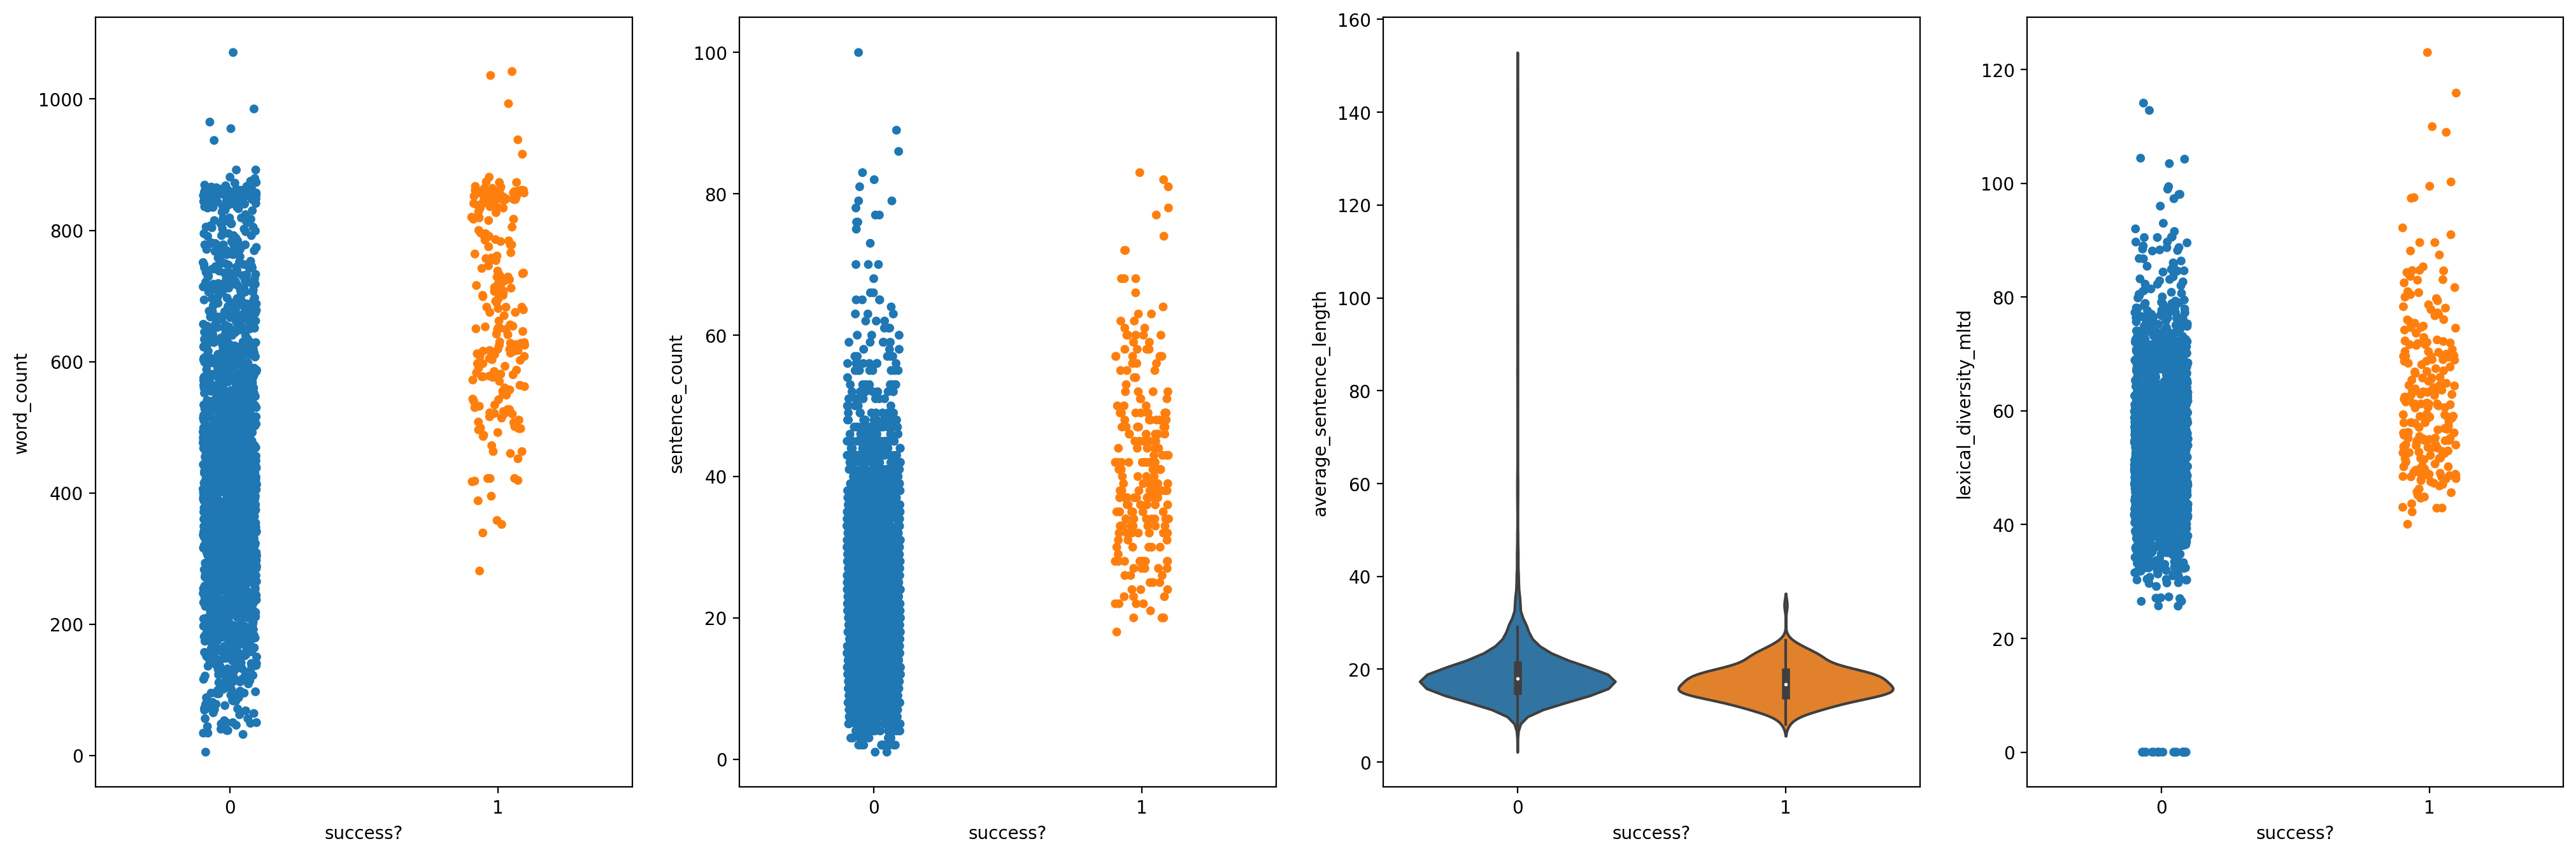

In [164]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 4, figsize=a4_dims)

sns.stripplot(x="success?", y="word_count", data=df, ax=axes[0])
sns.stripplot(x="success?", y="sentence_count", data=df, ax=axes[1])
sns.violinplot(x="success?", y="average_sentence_length", data=df, ax=axes[2])
sns.stripplot(x="success?", y="lexical_diversity_mltd", data=df, ax=axes[3])

In [194]:
df.loc[df["success?"] == 1].describe()

,word_count,sentence_count,average_sentence_length,lexical_diversity_mltd,key_rank_mean,key_rank_med,key_rank_mode,key_mean_word_count,key_mean_lex_div,success?
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0
mean,690.574561,42.254386,17.104636,63.850997,0.387656,0.395640,0.393935,21.111404,63.850997,1.0
std,147.787616,13.061570,3.732275,14.129739,0.041630,0.042958,0.049942,5.933764,14.129739,0.0
min,281.000000,18.000000,8.132530,40.070924,0.208985,0.235628,0.156696,7.000000,40.070924,1.0
25%,579.500000,33.000000,14.460819,53.858022,0.366170,0.372488,0.372210,17.150000,53.858022,1.0
50%,701.000000,41.000000,16.752020,61.232955,0.396809,0.417140,0.417140,20.600000,61.232955,1.0
75%,835.250000,49.000000,19.411616,71.546484,0.417140,0.425979,0.425979,25.050000,71.546484,1.0
max,1042.000000,83.000000,33.777778,123.012461,0.456536,0.487524,0.487524,42.800000,123.012461,1.0


In [ ]:
# a4_dims = (25, 8)
# # fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
# fig, axes = plt.subplots(1, 3, figsize=a4_dims)

# sns.stripplot(x="success?", y="rank_mean", data=df, ax=axes[0])
# sns.stripplot(x="success?", y="rank_med", data=df, ax=axes[1])
# sns.stripplot(x="success?", y="rank_mode", data=df, ax=axes[2])

<AxesSubplot:xlabel='success?', ylabel='key_rank_mode'>

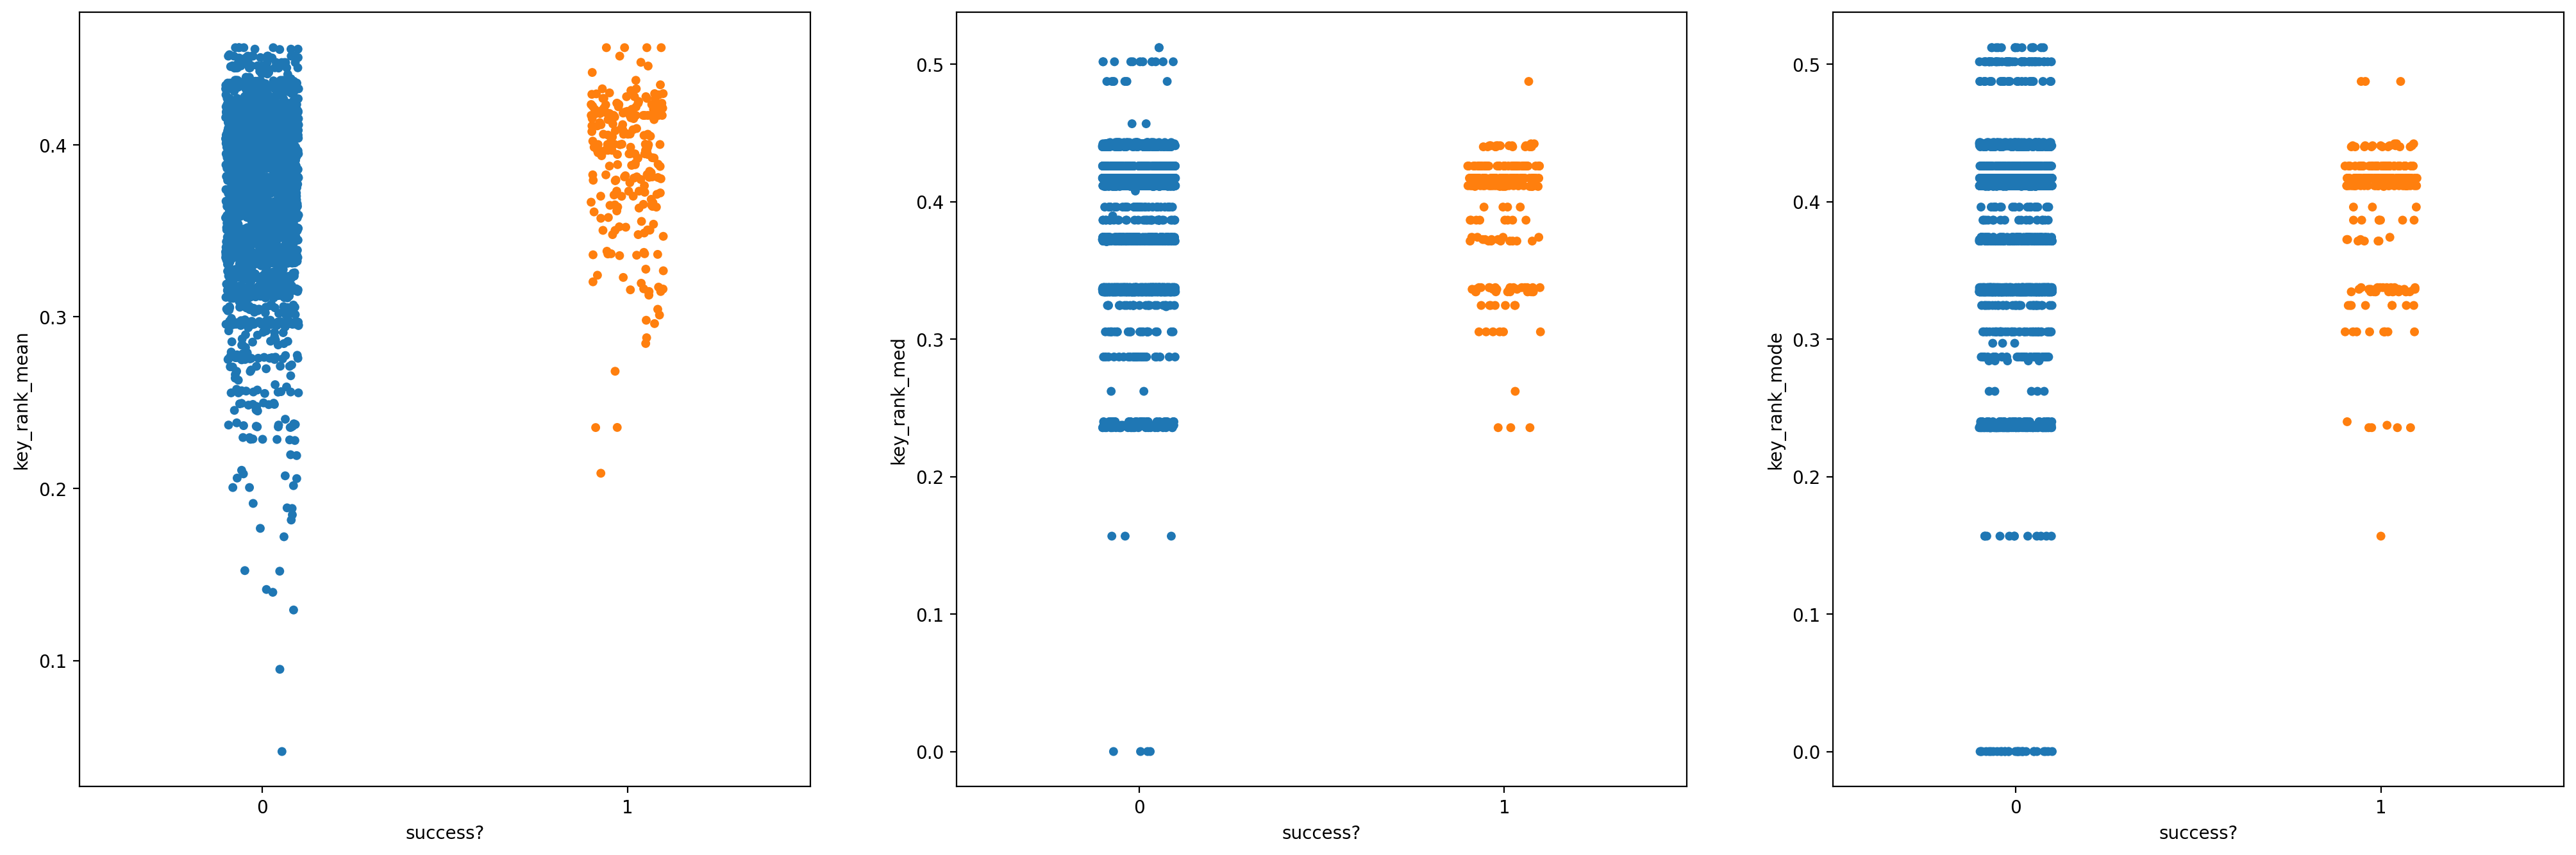

In [184]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 3, figsize=a4_dims)

sns.stripplot(x="success?", y="key_rank_mean", data=df, ax=axes[0])
sns.stripplot(x="success?", y="key_rank_med", data=df, ax=axes[1])
sns.stripplot(x="success?", y="key_rank_mode", data=df, ax=axes[2])
# sns.boxplot(x="success?", y="max_sent", data=df, ax=axes[3])

<AxesSubplot:xlabel='success?', ylabel='key_mean_lex_div'>

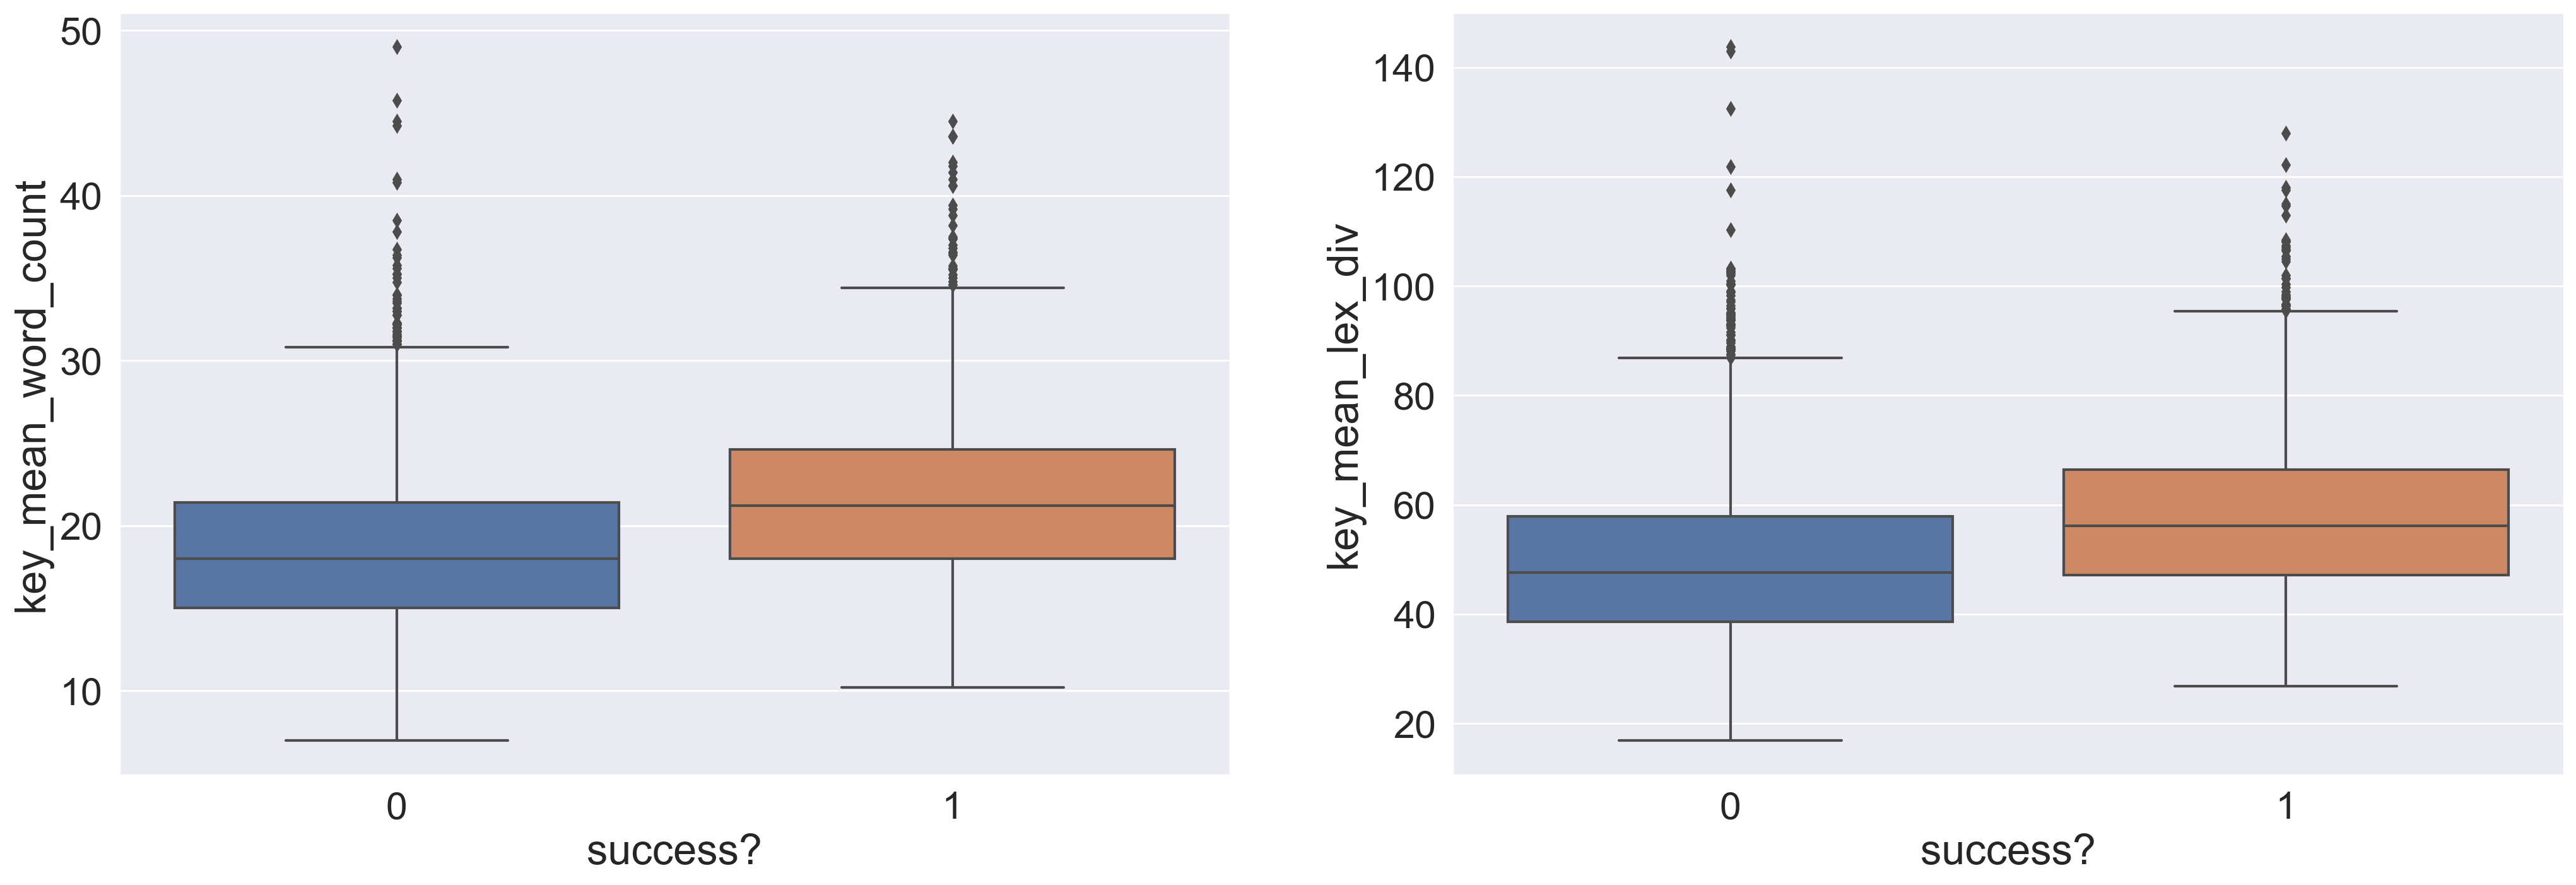

In [240]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.boxplot(x="success?", y="key_mean_word_count", data=df, ax=axes[0])
sns.boxplot(x="success?", y="key_mean_lex_div", data=df, ax=axes[1])
# sns.boxplot(x="success?", y="rank_mode", data=df, ax=axes[2])

In [183]:
# a4_dims = (25, 8)
# # fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
# fig, axes = plt.subplots(1, 2, figsize=a4_dims)

# sns.boxplot(x="success?", y="polarity", data=df, ax=axes[0])
# sns.boxplot(x="success?", y="subjectivity", data=df, ax=axes[1])

### SRD essays - feature extraction

In [227]:
# Uncomment to use subset of data for debugging
num_rows = 8
# srd_essay_df = srd_essay_df.iloc[5:num_rows,:]

srd_ft = run_feature_extraction(srd_essay_df)

#### write to csv

In [236]:
srd_res_df = pd.DataFrame(srd_ft)
srd_res_df.to_csv("srd_res_df.csv", index=False)
print(srd_res_df.shape)
srd_res_df.head()

(5298, 10)


,word_count,sentence_count,average_sentence_length,lexical_diversity_mltd,key_rank_mean,key_rank_med,key_rank_mode,key_mean_word_count,key_mean_lex_div,success?
0,51,4,12.750,18.904425,0.408038,0.395379,0.340881,12.75,18.904425,0
1,176,11,16.000,47.191316,0.435405,0.433866,0.443383,18.60,47.191316,0
2,97,8,12.125,67.837997,0.396575,0.362617,0.340881,15.80,67.837997,0
3,88,4,22.000,49.881360,0.400373,0.425715,0.500514,22.00,49.881360,0
4,135,4,33.750,31.672927,0.430848,0.428195,0.366489,33.75,31.672927,0


### SRD essays - evaluate feature results

In [229]:
df = srd_res_df.copy()

<AxesSubplot:xlabel='success?', ylabel='lexical_diversity_mltd'>

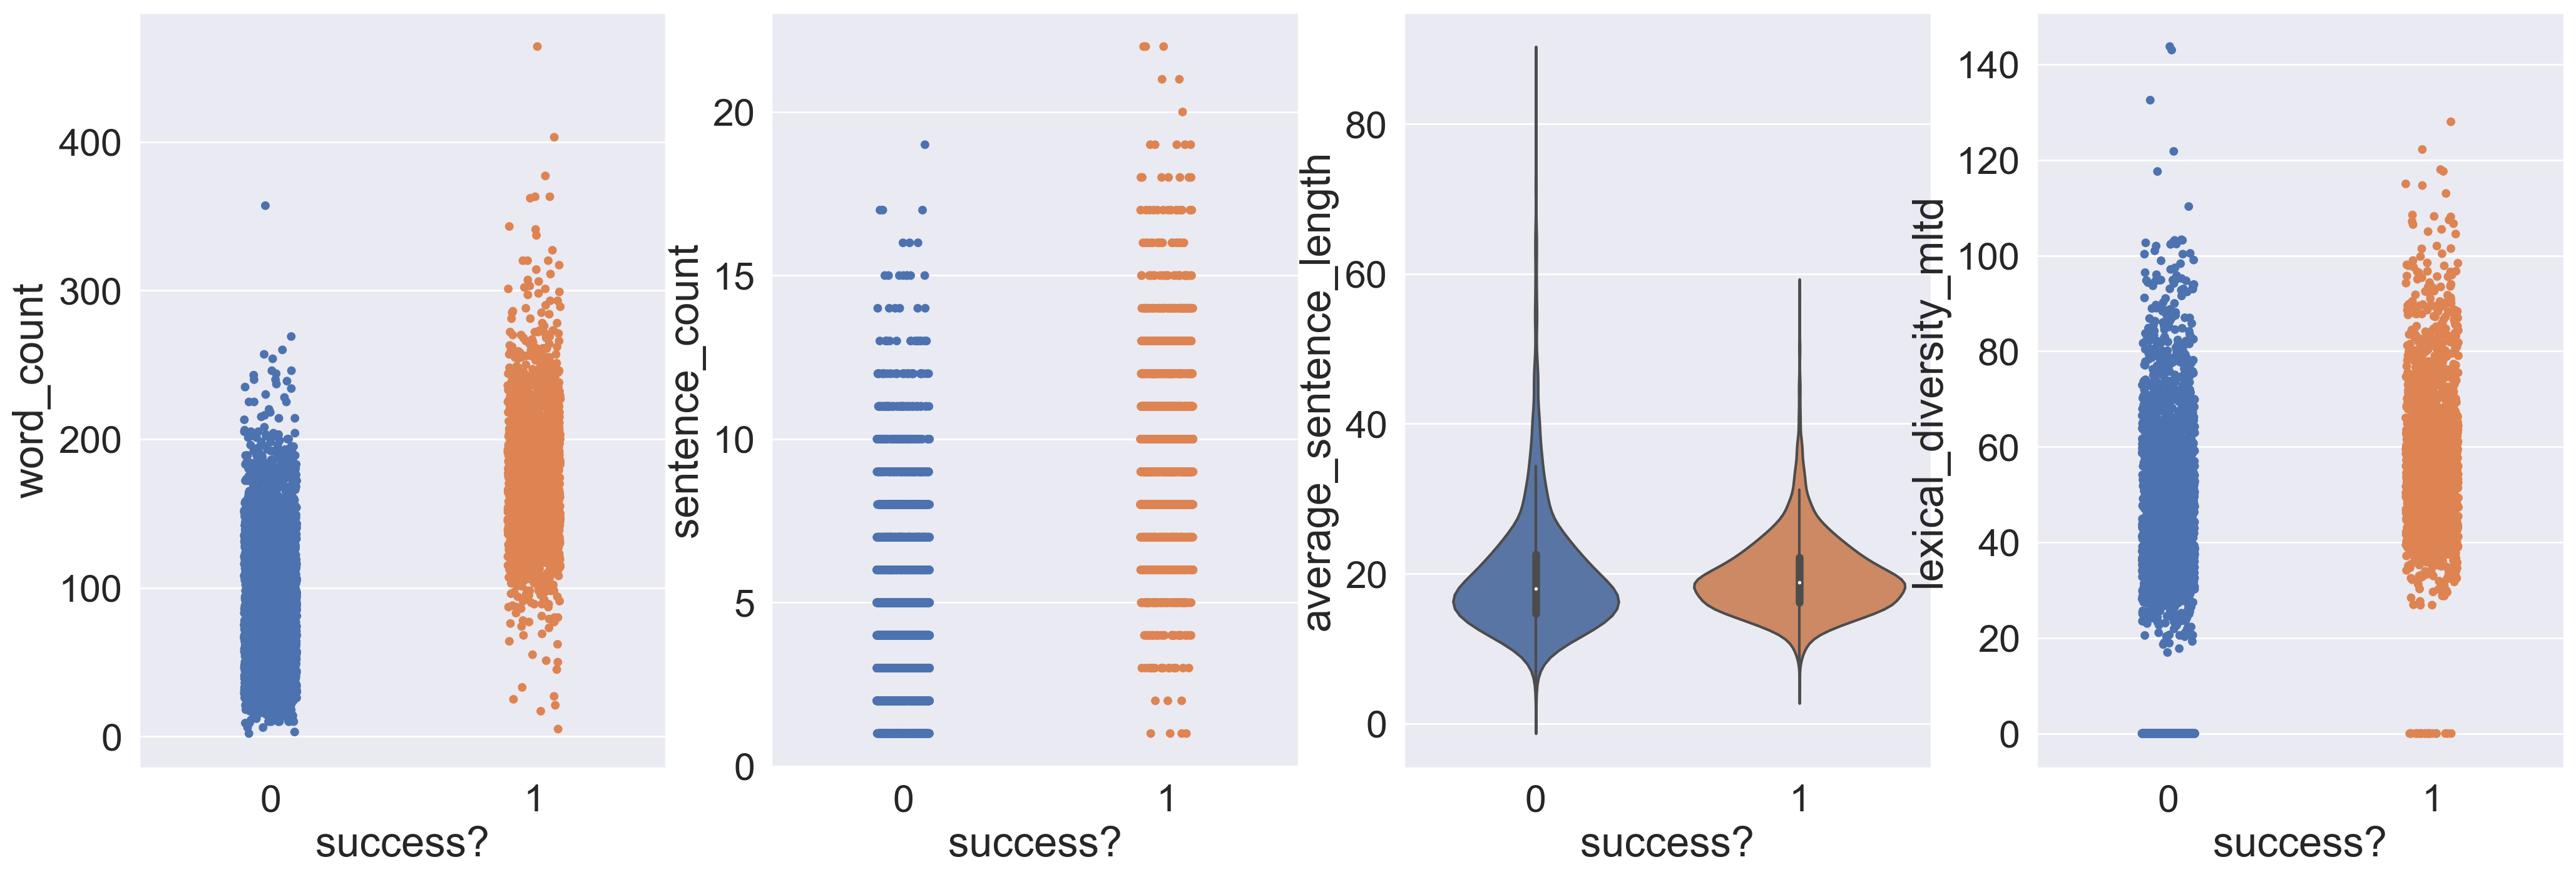

In [230]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 4, figsize=a4_dims)

sns.stripplot(x="success?", y="word_count", data=df, ax=axes[0])
sns.stripplot(x="success?", y="sentence_count", data=df, ax=axes[1])
sns.violinplot(x="success?", y="average_sentence_length", data=df, ax=axes[2])
sns.stripplot(x="success?", y="lexical_diversity_mltd", data=df, ax=axes[3])

In [233]:
df.loc[df["success?"] == 1].describe()

,word_count,sentence_count,average_sentence_length,lexical_diversity_mltd,key_rank_mean,key_rank_med,key_rank_mode,key_mean_word_count,key_mean_lex_div,success?
count,1860.000000,1860.000000,1860.000000,1860.000000,1837.000000,1837.000000,1837.000000,1837.000000,1837.000000,1860.0
mean,174.406989,9.273656,19.680406,57.278582,0.406668,0.420440,0.411021,21.664725,57.995734,1.0
std,45.674439,2.870310,5.148985,16.271238,0.033037,0.038058,0.071976,5.214350,15.048436,0.0
min,5.000000,1.000000,5.000000,0.000000,0.184892,0.215494,0.000000,10.200000,26.841269,1.0
25%,144.000000,7.000000,16.163462,46.742594,0.387686,0.425791,0.355788,18.000000,47.134373,1.0
50%,171.000000,9.000000,18.866071,55.931778,0.414771,0.432217,0.428762,21.200000,56.166667,1.0
75%,200.000000,11.000000,22.166667,66.317371,0.430883,0.435631,0.435742,24.600000,66.441482,1.0
max,464.000000,22.000000,57.000000,127.994100,0.455729,0.511760,0.511760,44.500000,127.994100,1.0


<AxesSubplot:xlabel='success?', ylabel='key_rank_mode'>

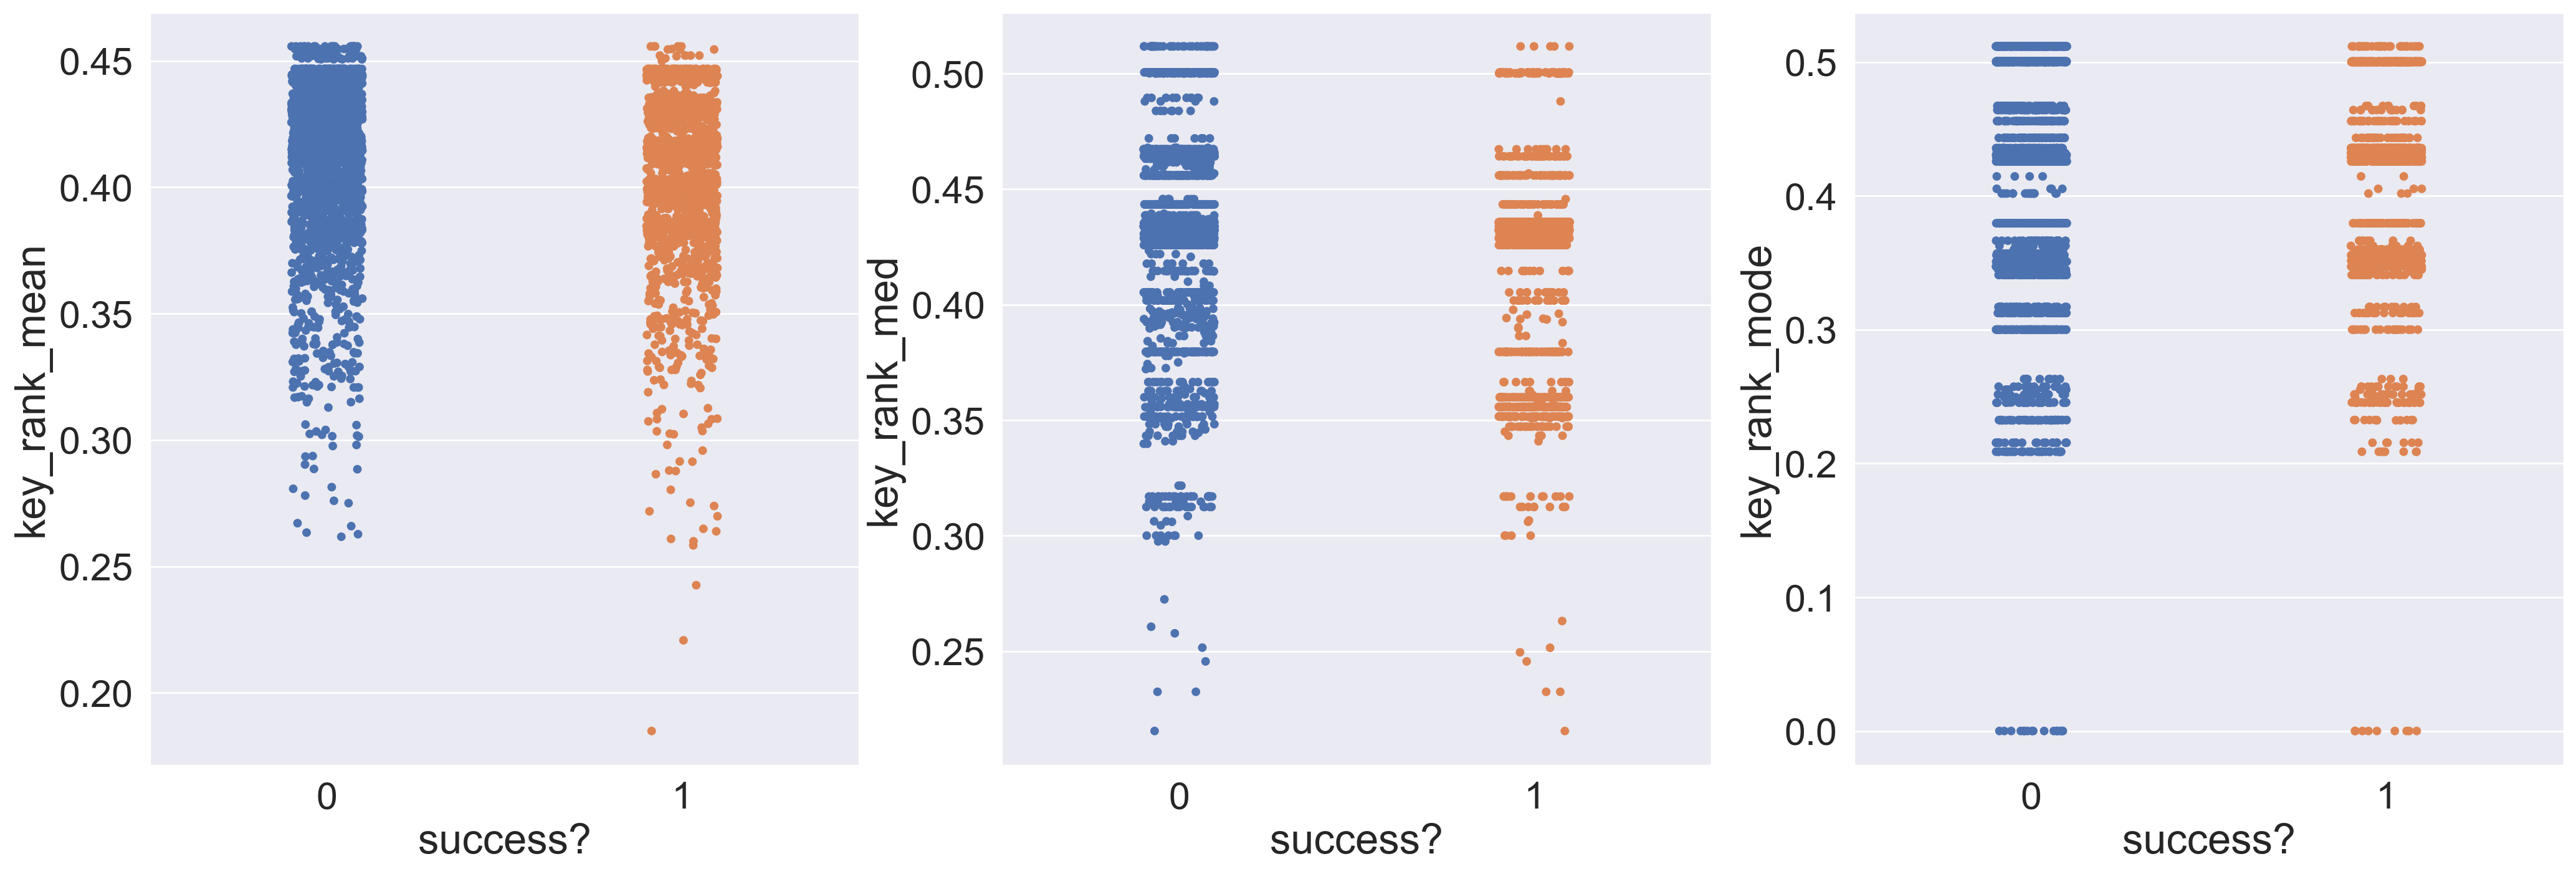

In [234]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 3, figsize=a4_dims)

sns.stripplot(x="success?", y="key_rank_mean", data=df, ax=axes[0])
sns.stripplot(x="success?", y="key_rank_med", data=df, ax=axes[1])
sns.stripplot(x="success?", y="key_rank_mode", data=df, ax=axes[2])

<AxesSubplot:xlabel='success?', ylabel='key_mean_lex_div'>

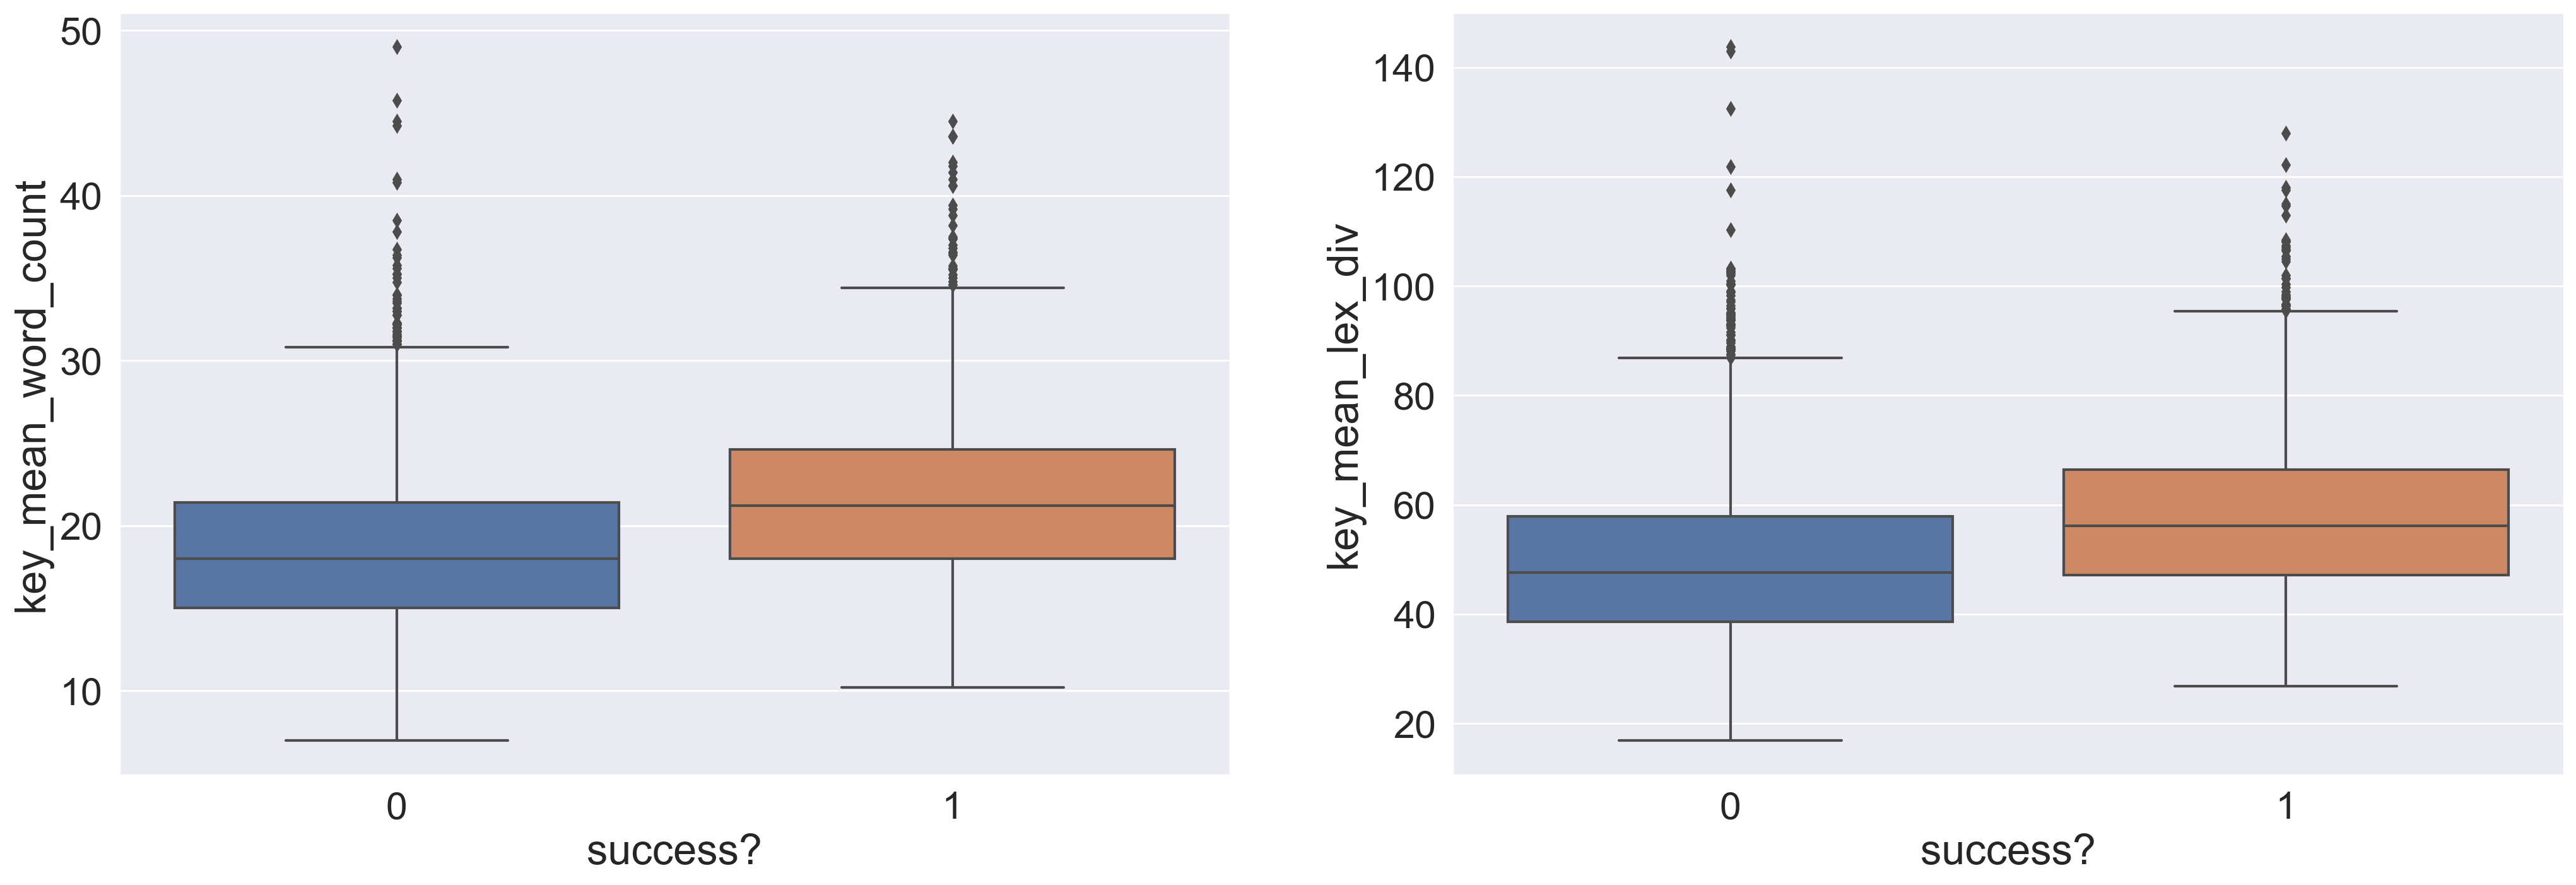

In [235]:
a4_dims = (25, 8)
# fig, axs = plt.subplots(ncols=3, figsize=a4_dims)
fig, axes = plt.subplots(1, 2, figsize=a4_dims)

sns.boxplot(x="success?", y="key_mean_word_count", data=df, ax=axes[0])
sns.boxplot(x="success?", y="key_mean_lex_div", data=df, ax=axes[1])